In [1]:
#Install below libraries
!pip install xgboost
!pip install graphviz


!pip install pydotplus
!pip install chart_studio

In [2]:
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn import preprocessing, model_selection, metrics
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn import preprocessing  
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import datasets, utils, tree
from sklearn.tree import export_graphviz 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from IPython import display
from graphviz import Source
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import learning_curve

C:\Users\14696\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [3]:
#Set Seed
np.random.seed(42)

In [4]:
#Reading the Data Set
gpuread = pd.read_csv("sgemm_product.csv")
gpuread.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000


In [5]:
# Calculating average gpu run time

df_run = DataFrame(gpuread,columns=['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'])

gpuread['Avg_Run'] = df_run.mean(axis =1)
gpuread['log_avg_run'] = np.log(gpuread.Avg_Run).round(3)

gpuread

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Avg_Run,log_avg_run
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.3700,4.757
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.7050,4.366
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.5650,4.389
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,86.6375,4.462
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,118.6625,4.776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.96,17.77,17.77,17.77,17.8175,2.880
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.04,36.03,36.04,36.03,36.0350,3.584
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.28,34.82,35.27,35.27,35.1600,3.560
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.43,28.49,28.44,28.45,28.4525,3.348


In [6]:
# Convert value above 4.24(Median Value) to 1s and below to 0s

gpuread['gpuruntime_class'] = np.where(gpuread['log_avg_run']>=4.24, 1, 0)
gpuread['gpuruntime_class'] = gpuread['gpuruntime_class'].astype('category')

gpuread.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,...,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Avg_Run,log_avg_run,gpuruntime_class
0,16,16,16,8,8,8,8,2,1,1,...,0,0,0,115.26,115.87,118.55,115.80,116.3700,4.757,1
1,16,16,16,8,8,8,8,2,1,1,...,0,0,1,78.13,78.25,79.25,79.19,78.7050,4.366,1
2,16,16,16,8,8,8,8,2,1,1,...,0,1,0,79.84,80.69,80.76,80.97,80.5650,4.389,1
3,16,16,16,8,8,8,8,2,1,1,...,0,1,1,84.32,89.90,86.75,85.58,86.6375,4.462,1
4,16,16,16,8,8,8,8,2,1,1,...,1,0,0,115.13,121.98,122.73,114.81,118.6625,4.776,1


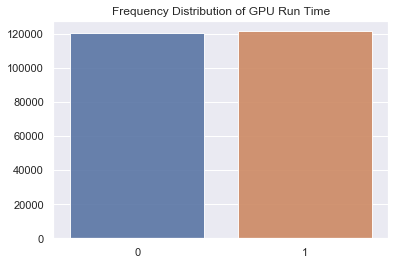

1    121395
0    120205
Name: gpuruntime_class, dtype: int64


In [7]:
class_count1 = gpuread['gpuruntime_class'].value_counts()
sns.set(style="darkgrid")
sns.barplot(class_count1.index, class_count1.values, alpha=0.9)
plt.title('Frequency Distribution of GPU Run Time')
plt.show()
print(gpuread['gpuruntime_class'].value_counts())

In [8]:
#Scaling

scaler = preprocessing.MinMaxScaler()
scaler.fit(gpuread)
df = pd.DataFrame(scaler.transform(gpuread), index=gpuread.index, columns=gpuread.columns)
df.iloc[4:10]

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,...,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Avg_Run,log_avg_run,gpuruntime_class
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.030616,0.032339,0.032322,0.030296,0.031652,0.395837,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.020386,0.020570,0.021766,0.020539,0.020987,0.331584,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.021050,0.020704,0.022236,0.020786,0.021368,0.334299,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.024002,0.024106,0.024479,0.024209,0.024396,0.354751,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.031293,0.030843,0.032742,0.031198,0.031777,0.396561,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.021787,0.021430,0.021751,0.022047,0.021929,0.338281,1.0


In [9]:
df=df.sample(n=20000)

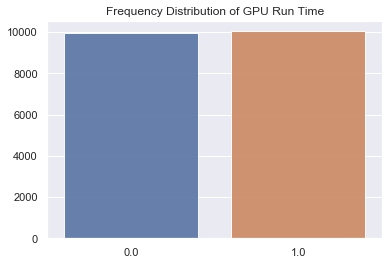

1.0    10038
0.0     9962
Name: gpuruntime_class, dtype: int64


In [10]:
class_count = df['gpuruntime_class'].value_counts()
sns.set(style="darkgrid")
sns.barplot(class_count.index, class_count.values, alpha=0.9)
plt.title('Frequency Distribution of GPU Run Time')
plt.show()
print(df['gpuruntime_class'].value_counts())

In [11]:
df.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,...,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),Avg_Run,log_avg_run,gpuruntime_class
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.577229,0.572836,0.593500,0.250717,0.244317,0.388767,0.389867,0.501900,0.209243,0.207950,...,0.499850,0.499700,0.492500,0.060070,0.059421,0.059000,0.059621,0.060008,0.366838,0.501900
std,0.379064,0.379344,0.491192,0.330432,0.325300,0.389603,0.392726,0.500009,0.281858,0.278832,...,0.500012,0.500012,0.499956,0.107576,0.106316,0.105633,0.106784,0.107434,0.202637,0.500009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000033,0.000006,0.000084,0.000031,0.001448,0.000000
25%,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.008225,0.008164,0.008059,0.008126,0.008215,0.201991,0.000000
50%,0.428571,0.428571,1.000000,0.000000,0.000000,0.333333,0.333333,1.000000,0.142857,0.142857,...,0.000000,0.000000,0.000000,0.016972,0.016825,0.016627,0.016840,0.016956,0.299729,1.000000
75%,1.000000,1.000000,1.000000,0.333333,0.333333,1.000000,1.000000,1.000000,0.428571,0.428571,...,1.000000,1.000000,1.000000,0.064135,0.063497,0.063087,0.063753,0.064048,0.512805,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.989313,1.000000,0.978639,0.997569,0.999387,1.000000,1.000000


In [12]:
X = df[['MWG','NWG','KWG','MDIMC','NDIMC','MDIMA','NDIMB','KWI','VWM','VWN','STRM','STRN','SA','SB','Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)']]
y = df[['gpuruntime_class']]


In [13]:

#Train and Test Split

X_trainS, X_testS, y_trainS, y_testS = train_test_split( 
                        X,y, 
                test_size = 0.30, random_state = 100)


# SVM - Linear Kernal


In [14]:
# defining parameter range 
param_grid_l = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear']}  
  
grid_l = GridSearchCV(SVC(), param_grid=param_grid_l, refit = True, verbose = 2,return_train_score=True) 
  
# fitting the model for grid search 
grid_l.fit(X_trainS, y_trainS)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... C=0.1, gamma=1, kernel=linear, total=   1.3s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] .................... C=0.1, gamma=1, kernel=linear, total=   2.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .................... C=0.1, gamma=1, kernel=linear, total=   2.1s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   1.6s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   1.3s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   1.6s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=   1.2s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] ................. C=0.1, gamma=0.01, kernel=linear, total=   1.8s
[CV] C=0.1, gamma=0.01, kernel=linear ................................
[CV] .

[CV] ............... C=100, gamma=0.0001, kernel=linear, total=   1.2s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=2)

In [15]:
# print best parameter after tuning 
print(grid_l.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_l.best_estimator_)

{'C': 100, 'gamma': 1, 'kernel': 'linear'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [16]:
# Evaluate train set accuracy
train_acc1 = grid_l.score(X_trainS,y_trainS)
print("Train set accuracy of best model: {:.3f}".format(train_acc1))

Train set accuracy of best model: 0.987


In [17]:
grid_predictions_l = grid_l.predict(X_testS) 
print(confusion_matrix(y_testS, grid_predictions_l))
# print classification report 

print("Accuracy:",metrics.accuracy_score(y_testS,grid_predictions_l ))
print(classification_report(y_testS, grid_predictions_l))

[[2977   38]
 [  45 2940]]
Accuracy: 0.9861666666666666
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3015
         1.0       0.99      0.98      0.99      2985

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



In [18]:
print("Train Error",1-train_acc1)
print("Test Error",1-metrics.accuracy_score(y_testS,grid_predictions_l ))

Train Error 0.0128571428571429
Test Error 0.013833333333333364


# Gaussian Kernal

In [19]:
# defining parameter range 
param_grid_g = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid_g = GridSearchCV(SVC(), param_grid=param_grid_g, refit = True, verbose = 2) 
  
# fitting the model for grid search 
grid_g.fit(X_trainS, y_trainS)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   4.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   3.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   3.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   2.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   2.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   3.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   3.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=   3.7s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] .................. C=100, gamma=0.0001, kernel=rbf, total=   2.7s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  2.8min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [20]:
# print best parameter after tuning 
print(grid_g.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_g.best_estimator_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [21]:
# Evaluate train set accuracy
train_acc2 = grid_g.score(X_trainS,y_trainS)
print("Train set accuracy of best model: {:.3f}".format(train_acc2))

Train set accuracy of best model: 0.983


In [22]:
grid_predictions_g = grid_g.predict(X_testS) 
print(confusion_matrix(y_testS, grid_predictions_g))
# print classification report 
print("Accuracy:",metrics.accuracy_score(y_testS,grid_predictions_g ))
print(classification_report(y_testS, grid_predictions_g))

[[2951   64]
 [  97 2888]]
Accuracy: 0.9731666666666666
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      3015
         1.0       0.98      0.97      0.97      2985

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



In [23]:
print("Train Error",1-train_acc2)
print("Test Error",1-metrics.accuracy_score(y_testS,grid_predictions_g ))

Train Error 0.01664285714285718
Test Error 0.026833333333333376


# Polynomial Kernal

In [24]:
# defining parameter range 
param_grid_s = {'C': [0.1, 1, 10], 'degree':[3,5], 
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['poly']}  
  
grid_s = GridSearchCV(SVC(), param_grid=param_grid_s, refit = True, verbose = 2) 
  
# fitting the model for grid search 
grid_s.fit(X_trainS, y_trainS)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] C=0.1, degree=3, gamma=1, kernel=poly ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=0.1, degree=3, gamma=1, kernel=poly, total=   1.1s
[CV] C=0.1, degree=3, gamma=1, kernel=poly ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ............ C=0.1, degree=3, gamma=1, kernel=poly, total=   1.1s
[CV] C=0.1, degree=3, gamma=1, kernel=poly ...........................
[CV] ............ C=0.1, degree=3, gamma=1, kernel=poly, total=   1.1s
[CV] C=0.1, degree=3, gamma=0.1, kernel=poly .........................
[CV] .......... C=0.1, degree=3, gamma=0.1, kernel=poly, total=   2.4s
[CV] C=0.1, degree=3, gamma=0.1, kernel=poly .........................
[CV] .......... C=0.1, degree=3, gamma=0.1, kernel=poly, total=   2.4s
[CV] C=0.1, degree=3, gamma=0.1, kernel=poly .........................
[CV] .......... C=0.1, degree=3, gamma=0.1, kernel=poly, total=   2.4s
[CV] C=0.1, degree=3, gamma=0.01, kernel=poly ........................
[CV] ......... C=0.1, degree=3, gamma=0.01, kernel=poly, total=   3.0s
[CV] C=0.1, degree=3, gamma=0.01, kernel=poly ........................
[CV] ......... C=0.1, degree=3, gamma=0.01, kernel=poly, total=   3.0s
[CV] C=0.1, degree=3, gamma=0.01, kernel=poly ........................
[CV] .

[CV] ......... C=10, degree=3, gamma=0.001, kernel=poly, total=   3.1s
[CV] C=10, degree=5, gamma=1, kernel=poly ............................
[CV] ............. C=10, degree=5, gamma=1, kernel=poly, total=   1.7s
[CV] C=10, degree=5, gamma=1, kernel=poly ............................
[CV] ............. C=10, degree=5, gamma=1, kernel=poly, total=   1.6s
[CV] C=10, degree=5, gamma=1, kernel=poly ............................
[CV] ............. C=10, degree=5, gamma=1, kernel=poly, total=   1.7s
[CV] C=10, degree=5, gamma=0.1, kernel=poly ..........................
[CV] ........... C=10, degree=5, gamma=0.1, kernel=poly, total=   2.0s
[CV] C=10, degree=5, gamma=0.1, kernel=poly ..........................
[CV] ........... C=10, degree=5, gamma=0.1, kernel=poly, total=   1.8s
[CV] C=10, degree=5, gamma=0.1, kernel=poly ..........................
[CV] ........... C=10, degree=5, gamma=0.1, kernel=poly, total=   1.7s
[CV] C=10, degree=5, gamma=0.01, kernel=poly .........................
[CV] .

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:  3.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'degree': [3, 5],
                         'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [25]:
# print best parameter after tuning 
print(grid_s.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_s.best_estimator_)

{'C': 10, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [26]:

# Evaluate train set accuracy
train_acc3 = grid_s.score(X_trainS,y_trainS)
print("Train set accuracy of best model: {:.3f}".format(train_acc3))

Train set accuracy of best model: 0.992


In [27]:
grid_predictions_s = grid_s.predict(X_testS) 

# print classification report 
print(confusion_matrix(y_testS, grid_predictions_s))
print("Accuracy:",metrics.accuracy_score(y_testS,grid_predictions_s ))
print(classification_report(y_testS, grid_predictions_s))

[[2946   69]
 [  79 2906]]
Accuracy: 0.9753333333333334
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      3015
         1.0       0.98      0.97      0.98      2985

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000



In [28]:
print("Train Error",1-train_acc3)
print("Test Error",1-metrics.accuracy_score(y_testS,grid_predictions_s ))

Train Error 0.00821428571428573
Test Error 0.024666666666666615


# Decision Tree

# Normal Tree without using Hyperparameters

In [29]:
# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf1 = clf1.fit(X_trainS,y_trainS)


# Evaluate train set accuracy
train_acc4 = clf1.score(X_trainS,y_trainS)
print("Train set accuracy of best model: {:.3f}".format(train_acc4))

Train set accuracy of best model: 1.000


In [30]:
#Predict the response for test dataset
y_pred_nt = clf1.predict(X_testS)
# print classification report 
print(confusion_matrix(y_testS, y_pred_nt))
print("Accuracy:",metrics.accuracy_score(y_testS,y_pred_nt ))
print(classification_report(y_testS, y_pred_nt))

[[3013    2]
 [   0 2985]]
Accuracy: 0.9996666666666667
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3015
         1.0       1.00      1.00      1.00      2985

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [31]:
print("Train Error",1-train_acc4)
print("Test Error",1-metrics.accuracy_score(y_testS,y_pred_nt ))

Train Error 0.0
Test Error 0.0003333333333332966


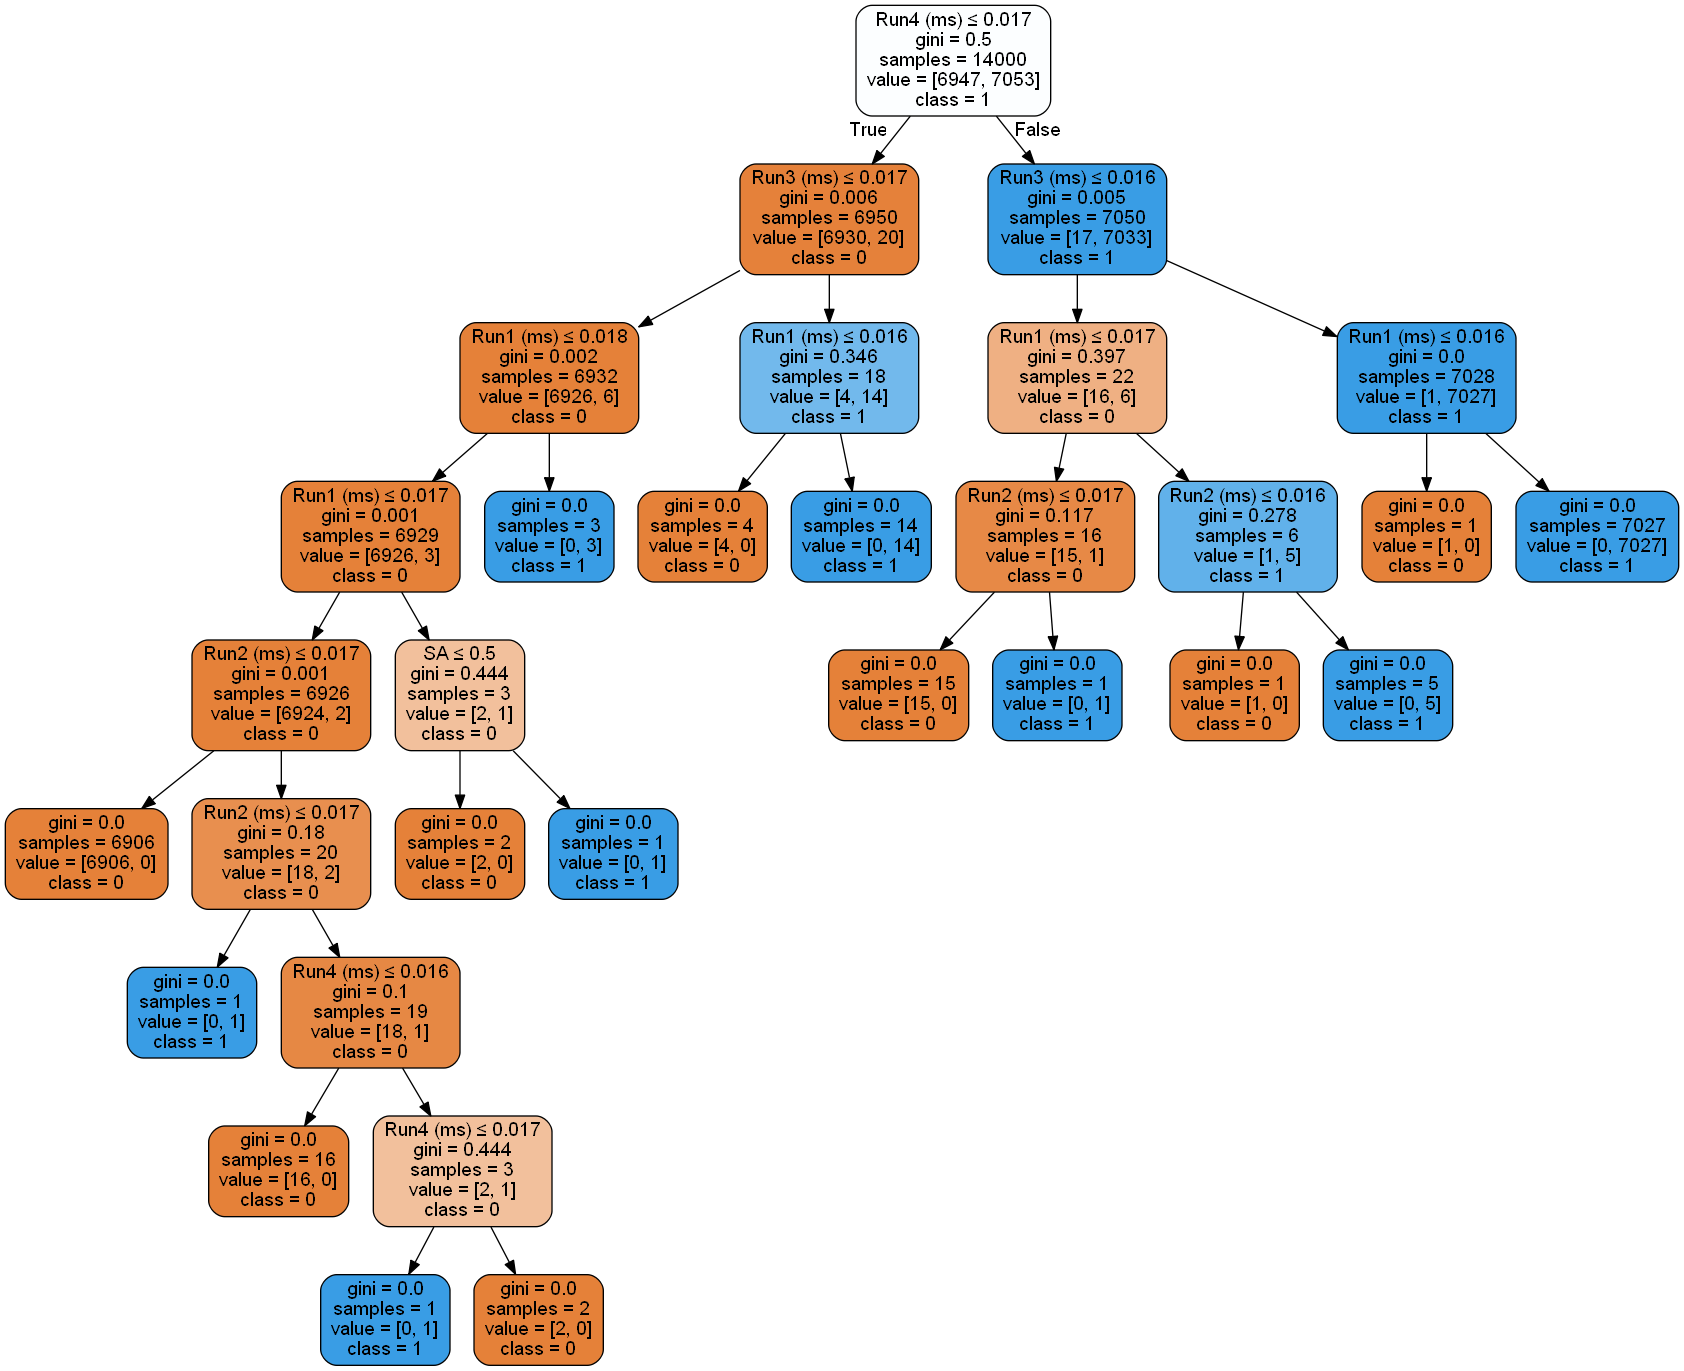

In [32]:
feature_cols=list(X)
dot_data = StringIO()

export_graphviz(clf1, out_file=dot_data,  
               filled=True, rounded=True,
              special_characters=True,feature_names = feature_cols,class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('GPURunTime.png')
Image(graph.create_png())


In [33]:
conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


# Pruned tree using Hyperparameter tuning

In [34]:
param_grid_dt= {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20]
              }

dt = DecisionTreeClassifier()
grid_dt = GridSearchCV(dt, param_grid=param_grid_dt, refit = True, verbose = 2) 


In [35]:
grid_dt.fit(X_trainS, y_trainS)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=None, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_

[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=None, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=None, max_le

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_sam

[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, mi

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20 
[CV]  criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=5, max_leaf_nodes=10, min_samples_leaf=

[CV]  criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=N

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=5, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=5, min_samp

[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=10, max_leaf_nodes=20, min_samples_l

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=20, tota

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=e

[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=None, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criteri

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=5, 

[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=2, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_lea

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=entrop

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=1, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_n

[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20 
[CV]  criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=5, min_samples_leaf=5, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_n

[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=10, min_samples_leaf=10, min_samples_split=20, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10 
[CV]  criterion=entropy, max_depth=10, max_leaf_nodes=20, min_samples_leaf=1, min_samples_split=10, total=   0.0s
[CV] criterion=entropy, max_depth=10, m

[Parallel(n_jobs=1)]: Done 864 out of 864 | elapsed:   17.1s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10],
                

In [36]:
# print best parameter after tuning 
print(grid_dt.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_dt.best_estimator_)

{'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [37]:
clf2=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
clf2 = clf2.fit(X_trainS,y_trainS)

In [60]:
# Evaluate train set accuracy
train_acc5 = clf2.score(X_trainS,y_trainS)
print("Train set accuracy of best model: {:.3f}".format(train_acc5))

Train set accuracy of best model: 0.999


In [39]:
grid_predictions_dt = clf2.predict(X_testS) 

# print classification report 
print(confusion_matrix(y_testS, grid_predictions_dt))
print("Accuracy:",metrics.accuracy_score(y_testS,grid_predictions_dt ))
print(classification_report(y_testS, grid_predictions_dt)) 

[[3012    3]
 [   4 2981]]
Accuracy: 0.9988333333333334
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3015
         1.0       1.00      1.00      1.00      2985

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [40]:
print("Train Error",1-train_acc5)
print("Test Error",1-metrics.accuracy_score(y_testS,grid_predictions_dt ))

Train Error 0.0012142857142857233
Test Error 0.0011666666666666492


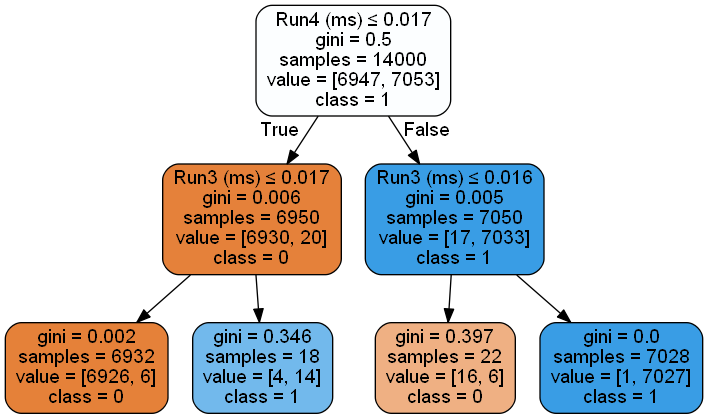

In [41]:
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('GPURunTime.png')
Image(graph.create_png())

# XGBoost


In [42]:

estimator = XGBClassifier(
    objective= 'binary:logistic', 
    nthread=4,
    seed=42)

In [43]:
# fit model no training data

xg1=estimator.fit(X_trainS, y_trainS)
train_acc6 = xg1.score(X_trainS,y_trainS)
print("Train set accuracy of best model: {:.3f}".format(train_acc6))

Train set accuracy of best model: 1.000


In [44]:
#Predict the response for test dataset
y_pred_xg1 = xg1.predict(X_testS)
# print classification report 
print(confusion_matrix(y_testS, y_pred_xg1))
print("Accuracy:",metrics.accuracy_score(y_testS,y_pred_xg1 ))
print(classification_report(y_testS, y_pred_xg1)) 

[[3014    1]
 [   2 2983]]
Accuracy: 0.9995
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3015
         1.0       1.00      1.00      1.00      2985

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [45]:
print("Train Error",1-train_acc6)
print("Test Error",1-metrics.accuracy_score(y_testS,y_pred_xg1 ))

Train Error 0.0
Test Error 0.0004999999999999449


# Hyperparameter tuning using Randomnised Search

In [46]:
parameters = {
    'max_depth': [2,3,5,10],
    'n_estimators': [100,500,1000],
    'learning_rate': [0.01,0.005,0.001],
    'min_child_weight': [1,5],
    'eta':[.3],
    'gamma': [0,1,5]
}

In [47]:

grid_xgb = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=parameters,
    scoring = 'roc_auc',
    verbose=True
)
grid_xgb.fit(X_trainS, y_trainS)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.8min finished


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster=None,
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints=No...
                                           tree_method=None,
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='warn', n_

In [48]:
# print best parameter after tuning 
print(grid_xgb.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid_xgb.best_estimator_) 

{'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.01, 'gamma': 5, 'eta': 0.3}
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=5,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)


In [49]:
xgb1=XGBClassifier(booster='gbtree', gamma=5,n_estimators=1000)
xgb1=xgb1.fit(X_trainS,y_trainS)

In [50]:
# Evaluate train set accuracy
train_acc7 = grid_xgb.score(X_trainS,y_trainS)
print("Train set accuracy of best model: {:.3f}".format(train_acc7))

Train set accuracy of best model: 1.000


In [51]:
#Predict the response for test dataset
y_pred_xg2 = grid_xgb.predict(X_testS)
# print classification report 
print(confusion_matrix(y_testS, y_pred_xg2))
print("Accuracy:",metrics.accuracy_score(y_testS,y_pred_xg2))
print(classification_report(y_testS, y_pred_xg2)) 

[[3013    2]
 [   1 2984]]
Accuracy: 0.9995
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3015
         1.0       1.00      1.00      1.00      2985

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [52]:
print("Train Error",1-train_acc7)
print("Test Error",1-metrics.accuracy_score(y_testS,y_pred_xg2 ))

Train Error 1.1102230246251565e-16
Test Error 0.0004999999999999449


# Learning Curve

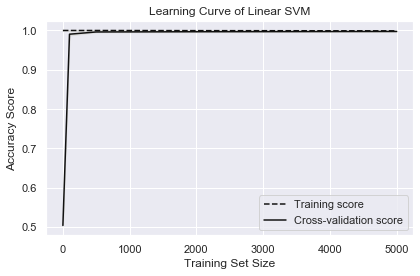

In [53]:
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(clf2,X = X_trainS,y = y_trainS, train_sizes = train_sizes,cv = 5, scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Linear SVM")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

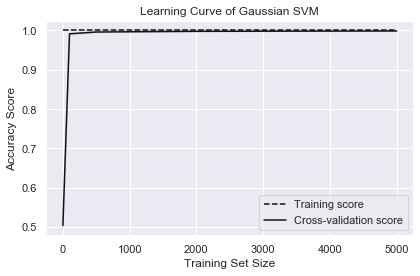

In [54]:
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(xgb1,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Gaussian SVM")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

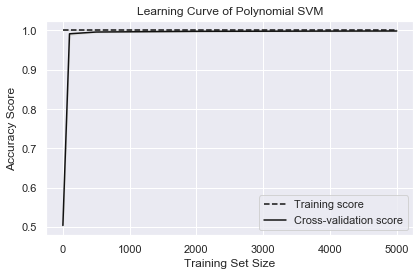

In [55]:
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(xg1,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Polynomial SVM")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

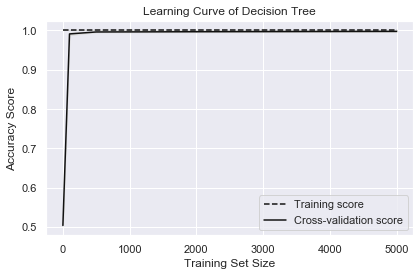

In [56]:
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(clf1,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Decision Tree")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

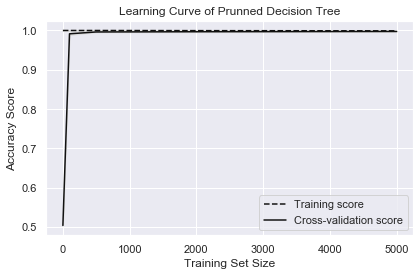

In [57]:
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(clf2,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Prunned Decision Tree")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

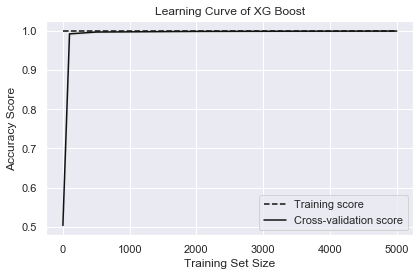

In [58]:
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(xg1,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of XG Boost")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

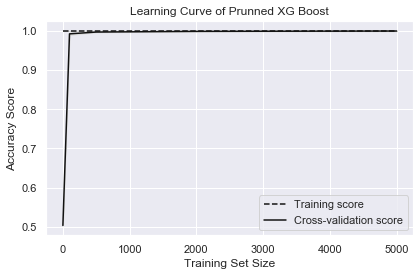

In [59]:
train_sizes = [1, 100, 500, 2000, 5000]
train_sizes, train_scores, validation_scores = learning_curve(xgb1,
X = X_trainS,
y = y_trainS, train_sizes = train_sizes, cv = 5,
scoring = 'accuracy')
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(validation_scores, axis=1)
test_std = np.std(validation_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve of Prunned XG Boost")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()